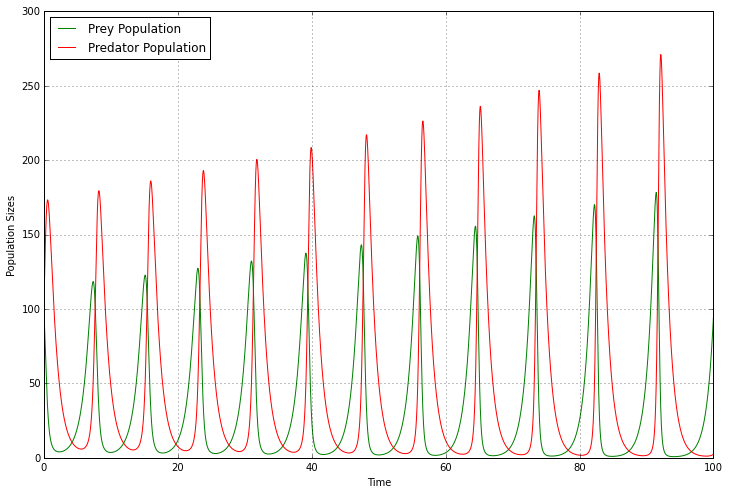

In [11]:


# -- Functions -- #


def generate_prey_rate_function(a, b):
    """
    Generates a Lotka-Volterra prey function:
    dx/dt = alpha * x - beta * x * y
    :param a: Alpha, the prey population growth parameter, > 0
    :param b: Beta, the prey-predator interaction prey death parameter, > 0
    :return: A function for the rate of change of prey population
    """
    def prey_rate_function(x, y, t):
        return a * x - b * x * y

    return prey_rate_function


def generate_predator_rate_function(c, d):
    """
    Generates a Lotka-Volterra predator function:
    dy/dt = delta * x * y - gamma * y
    :param c: Gamma, the predator population death parameter, > 0
    :param d: Delta, the prey-predator interaction predator growth parameter, > 0
    :return: A function for the rate of change of predator population
    """
    def predator_rate_function(x, y, t):
        return d * x * y - c * y

    return predator_rate_function


def eulers_method(rates, initial_values, time_values, time_step, min_values=(0, 0)):
    """
    Estimate a set of differential equations using Euler's method of linear estimation
    :param rates: An iterable with functions representing the rates of change of the different variable. Each function
    must accept as many parameters as they are rates + the time parameter -
    so if there are two functions (rates of change of x and y), each much accept three parameters (x, y, t)
    :param initial_values: An iterable with the initial values for each quantity represented - (x_0, y_0)
    :param time_values: A slice-able with the time values to estimate for
    :param time_step: h, the time step to take in each round
    :param min_values: An slice-able with minimal values each variable can take - defaults to
    :return: The sets of values each variable takes
    """
    # t = 0
    values = [[val] for val in initial_values]
    previous_values = list(initial_values)

    # next steps
    for t in time_values[1:]:
        params = previous_values + [t]
        rates_of_change = [rate_func(*params) for rate_func in rates]

        for i in xrange(len(values)):
            next_value = max(previous_values[i] + time_step * rates_of_change[i], min_values[i])
            values[i].append(next_value)
            previous_values[i] = next_value

    return values

DEFAULT_HORIZONTAL_SIZE = 12
DEFAULT_VERTICAL_SIZE = 8
DEFAULT_DPI = 400

def eulers_method_lotka_volterra(initial_prey, initial_predator, a, b, c, d, t_max, t_step):
    """
    Simulates the Lotka-Volterra equations using Euler's Method, and graphs the result
    :param initial_prey: The initial prey population (x_0)
    :param initial_predator: The initial predator population (y_0)
    :param a: Alpha, the prey population growth parameter, > 0
    :param b: Beta, the prey-predator interaction prey death parameter, > 0
    :param c: Gamma, the predator population death parameter, > 0
    :param d: Delta, the prey-predator interaction predator growth parameter, > 0
    :param t_max: The maximal time value to simulate until, > 0
    :param t_step: The time step to take, > 0
    :return: None - graphs result using matplotlib
    """
    prey_rate = generate_prey_rate_function(a, b)
    pred_rate = generate_predator_rate_function(c, d)

    time_values = [t * t_step for t in range(0, int(t_max / t_step))]

    prey_values, predator_values = \
        eulers_method((prey_rate, pred_rate), (initial_prey, initial_predator), time_values, t_step)

    figure, axes = plot.subplots()
    figure.set_size_inches(DEFAULT_HORIZONTAL_SIZE, DEFAULT_VERTICAL_SIZE)
    figure.set_dpi(DEFAULT_DPI)

    axes.plot(time_values, prey_values, label='Prey Population', color='green')
    axes.plot(time_values, predator_values, label='Predator Population', color='red')

    axes.set_xlabel('Time')
    axes.set_ylabel('Population Sizes')
    axes.legend(loc='best')
    axes.grid(True)

    plot.show()

# -- Main -- #

INITIAL_PREY = 100
INITIAL_PREDATOR = 100
ALPHA = 1
BETA = 0.02
GAMMA = 1
DELTA = 0.03
TIME_MAX = 100
TIME_STEP = 0.01


def main():
    eulers_method_lotka_volterra(INITIAL_PREY, INITIAL_PREDATOR, ALPHA, BETA, GAMMA, DELTA, TIME_MAX, TIME_STEP)
    # eulers_method_lotka_volterra(90, 30, 8, 0.27, 7, 0.13, 10, 0.01)
    # eulers_method_lotka_volterra(100, 50, 0.5, 0.002, 0.4, 0.004, 100, 0.01)


if __name__ == '__main__':
    main()


[1, 1, 225, 0, 6300.0, 0, 1764000.0, 0, 493920000.0, 0, 138297600000.0, 0, 38723328000000.0, 0, 1.084253184e+16, 0, 3.0359089152e+18, 0, 8.50054496256e+20, 0]
[1, 9, 10, 225.0, 0.0, 63000.0, 0.0, 17640000.0, 0.0, 4939200000.0, 0.0, 1382976000000.0, 0.0, 387233280000000.0, 0.0, 1.084253184e+17, 0.0, 3.0359089152e+19, 0.0, 8.50054496256e+21]
[1, 0, 9.0, 2235.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/guydavidson/Virtualenvs/dev/lib/python2.7/site-packages/matplotlib/ticker.py:1347: RuntimeWarning: invalid value encountered in double_scalars
  extra_bins = int(divmod((best_vmax - vmax), step)[0])


OverflowError: cannot convert float infinity to integer

/Users/guydavidson/virtualenvs/dev/lib/python2.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:161: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


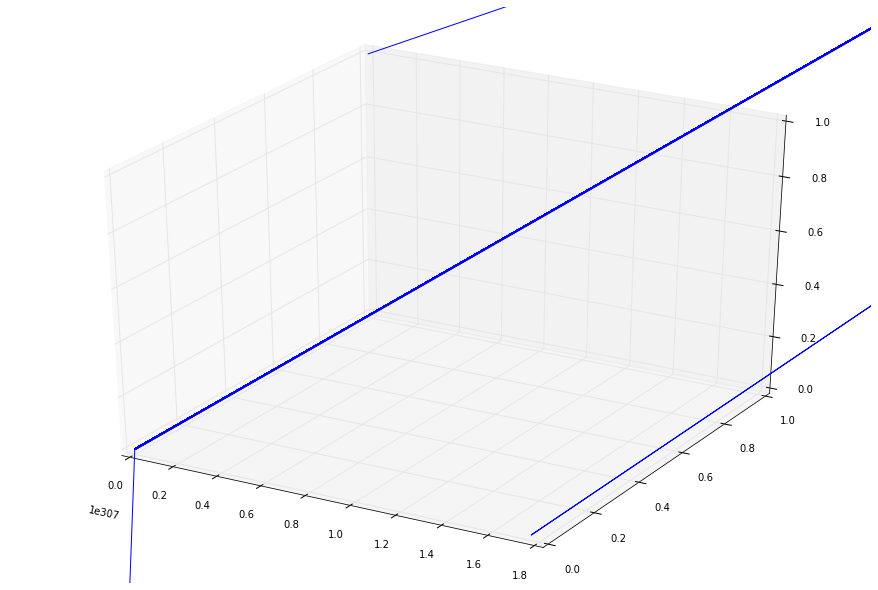

In [20]:
%matplotlib inline
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import axes3d, Axes3D


# -- Functions -- #


def generate_prey_rate_function(a, b):
    """
    Generates a Lotka-Volterra prey function:
    dx/dt = alpha * x - beta * x * y
    :param a: Alpha, the prey population growth parameter, > 0
    :param b: Beta, the prey-predator interaction prey death parameter, > 0
    :return: A function for the rate of change of prey population
    """
    def prey_rate_function(x, y, t):
        return a * x - b * x * y

    return prey_rate_function


def generate_predator_rate_function(c, d):
    """
    Generates a Lotka-Volterra predator function:
    dy/dt = delta * x * y - gamma * y
    :param c: Gamma, the predator population death parameter, > 0
    :param d: Delta, the prey-predator interaction predator growth parameter, > 0
    :return: A function for the rate of change of predator population
    """
    def predator_rate_function(x, y, t):
        return d * x * y - c * y

    return predator_rate_function


def generate_lorenz_system_equations(sigma, rho, beta):
    '''
    Generate a set of Lorenz System equations
    :param sigma:
    :param rho:
    :param beta:
    :return:
    '''
    def dx_dt(x, y, z, t):
        return sigma * (y - x)

    def dy_dt(x, y, z, t):
        return x * (rho - z) - y

    def dz_dt(x, y, z, t):
        return x * y - beta * z

    return (dx_dt, dy_dt, dz_dt)


def eulers_method(rates, initial_values, time_values, time_step, min_values=None):
    """
    Estimate a set of differential equations using Euler's method of linear estimation
    :param rates: An iterable with functions representing the rates of change of the different variable. Each function
    must accept as many parameters as they are rates + the time parameter -
    so if there are two functions (rates of change of x and y), each much accept three parameters (x, y, t)
    :param initial_values: An iterable with the initial values for each quantity represented - (x_0, y_0)
    :param time_values: A slice-able with the time values to estimate for
    :param time_step: h, the time step to take in each round
    :param min_values: An slice-able with minimal values each variable can take - defaults to
    :return: The sets of values each variable takes
    """
    # t = 0
    values = [[val] for val in initial_values]
    previous_values = list(initial_values)

    # next steps
    for t in time_values[1:]:
        params = previous_values + [t]
        rates_of_change = [rate_func(*params) for rate_func in rates]

        for i in xrange(len(values)):
            next_value = previous_values[i] + time_step * rates_of_change[i]

            if min_values:
                next_value = max(next_value, min_values[i])


            values[i].append(next_value)
            previous_values[i] = next_value

    return values


def eulers_method_lotka_volterra(initial_prey, initial_predator, a, b, c, d, t_max, t_step):
    """
    Simulates the Lotka-Volterra equations using Euler's Method, and graphs the result
    :param initial_prey: The initial prey population (x_0)
    :param initial_predator: The initial predator population (y_0)
    :param a: Alpha, the prey population growth parameter, > 0
    :param b: Beta, the prey-predator interaction prey death parameter, > 0
    :param c: Gamma, the predator population death parameter, > 0
    :param d: Delta, the prey-predator interaction predator growth parameter, > 0
    :param t_max: The maximal time value to simulate until, > 0
    :param t_step: The time step to take, > 0
    :return: None - graphs result using matplotlib
    """
    prey_rate = generate_prey_rate_function(a, b)
    pred_rate = generate_predator_rate_function(c, d)

    time_values = [t * t_step for t in range(0, int(t_max / t_step))]

    prey_values, predator_values = \
        eulers_method((prey_rate, pred_rate), (initial_prey, initial_predator), time_values, t_step, min_values=(0, 0))

    figure, axes = plot.subplots()

    axes.plot(time_values, prey_values, label='Prey Population', color='green')
    axes.plot(time_values, predator_values, label='Predator Population', color='red')

    axes.set_xlabel('Time')
    axes.set_ylabel('Population Sizes')
    axes.legend(loc='best')
    axes.grid(True)

    plot.show()

DEFAULT_HORIZONTAL_SIZE = 12
DEFAULT_VERTICAL_SIZE = 8
DEFAULT_DPI = 400


def eulers_method_lorenz_system(x0, y0, z0, rho, sigma, beta, t_max, t_step):
    equations = generate_lorenz_system_equations(rho, sigma, beta)
    time_values = [t * t_step for t in range(0, int(t_max / t_step))]

    x, y, z = eulers_method(equations, (x0, y0, z0), time_values, t_step, min_values=(0, 0, 0))
    print x[:20]
    print y[:20]
    print z[:20]
    
    figure = plot.figure()
    figure.set_size_inches(DEFAULT_HORIZONTAL_SIZE, DEFAULT_VERTICAL_SIZE)
    figure.set_dpi(DEFAULT_DPI)
    
    axes = Axes3D(figure)
    axes.plot(x, y, z,  label='Lorenz System', color='blue')
    
    axes.set_xlabel('Convective Intensity')
    axes.set_ylabel('Asc/Desc Temperature Difference')
    axes.set_zlabel('Difference in Vertical Temperature Profile')
    axes.legend(loc='best')
    axes.grid(True)

    plot.show()

# -- Main -- #

INITIAL_PREY = 100
INITIAL_PREDATOR = 100
ALPHA = 1
BETA = 0.02
GAMMA = 1
DELTA = 0.03
TIME_MAX = 100
TIME_STEP = 0.01


def main():
    # eulers_method_lotka_volterra(INITIAL_PREY, INITIAL_PREDATOR, ALPHA, BETA, GAMMA, DELTA, TIME_MAX, TIME_STEP)
    # eulers_method_lotka_volterra(90, 30, 8, 0.27, 7, 0.13, 10, 0.01)
    # eulers_method_lotka_volterra(100, 50, 0.5, 0.002, 0.4, 0.004, 100, 0.01)
    eulers_method_lorenz_system(1, 1, 1, 28, 10, float(8)/3, 10000, 1)


if __name__ == '__main__':
    main()


In [9]:
%matplotlib inline